In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")


In [2]:

file_path = 'dataset/API_SP.POP.TOTL_DS2_en_csv_v2_20333.csv'
df = pd.read_csv(file_path, skiprows=4)
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [3]:

df = df.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 69'], errors='ignore')

df_melted = df.melt(id_vars=['Country Name', 'Country Code'],
                    var_name='Year',
                    value_name='Population')

df_melted.dropna(inplace=True)

df_melted['Year'] = df_melted['Year'].astype(int)

# Preview the transformed data
df_melted.head()


,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54922.0
1,Africa Eastern and Southern,AFE,1960,130075728.0
2,Afghanistan,AFG,1960,9035043.0
3,Africa Western and Central,AFW,1960,97630925.0
4,Angola,AGO,1960,5231654.0


In [6]:
# Filtering Data for 2024
pop_2024 = df_melted[df_melted['Year'] == 2024]

In [7]:

desc_stats = pop_2024['Population'].describe()
print("Descriptive Statistics for Population in 2024:\n")
print(desc_stats)

most_pop = pop_2024.loc[pop_2024['Population'].idxmax()]
least_pop = pop_2024.loc[pop_2024['Population'].idxmin()]

print(f"\n Most Populated Country in 2024: {most_pop['Country Name']} - {int(most_pop['Population']):,}")
print(f" Least Populated Country in 2024: {least_pop['Country Name']} - {int(least_pop['Population']):,}")


Descriptive Statistics for Population in 2024:

count    2.650000e+02
mean     3.318869e+08
std      1.021734e+09
min      9.646000e+03
25%      1.792179e+06
50%      1.087698e+07
75%      6.851670e+07
max      8.142056e+09
Name: Population, dtype: float64

 Most Populated Country in 2024: World - 8,142,056,446
 Least Populated Country in 2024: Tuvalu - 9,646


In [8]:
df_melted.to_csv('dataset/cleaned_population_data.csv', index=False)

<Figure size 1000x600 with 0 Axes>

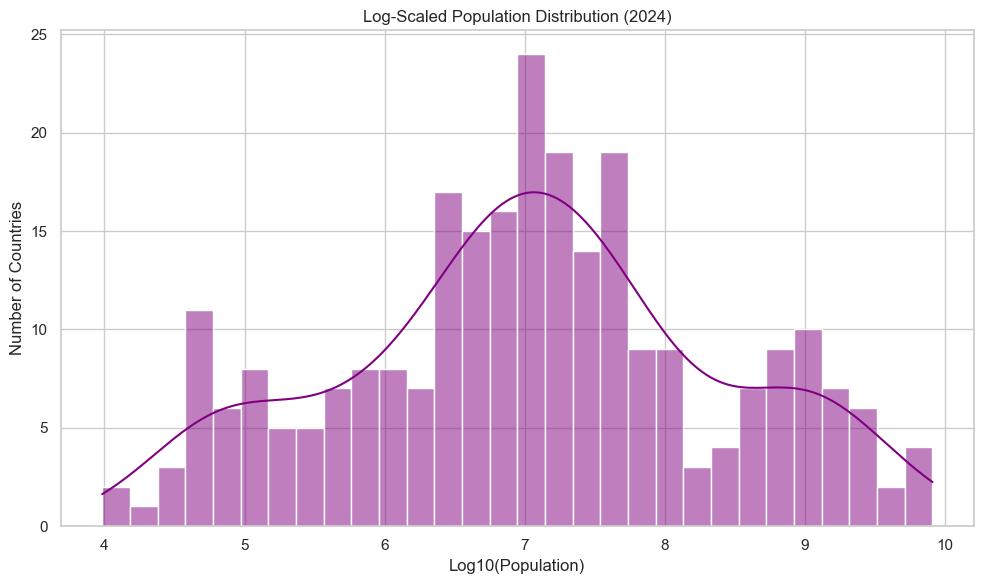

In [9]:
#HISTOGRAM PLOTTING

import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(np.log10(pop_2024['Population']), bins=30, kde=True, color='purple')
plt.title('Log-Scaled Population Distribution (2024)')
plt.xlabel('Log10(Population)', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.tight_layout()
plt.show()

